In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold,ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

import preprocess
%load_ext autoreload
%autoreload 2

## Feature Engineering

In [ ]:
def add_new_features1(df):
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    return df


In [ ]:
# Function for comparing different approaches
def score_dataset_rf(X_train, X_valid, y_train, y_valid,error_fn=mean_absolute_error):
    model = RandomForestRegressor(n_estimators=100, random_state=100)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return error_fn(y_valid, preds)

def score_dataset_gb(X_train, X_valid, y_train, y_valid,error_fn=mean_absolute_error):
    model = GradientBoostingRegressor(n_estimators=100, random_state=100)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return error_fn(y_valid, preds)

In [ ]:
X = pd.read_csv('../datasets/iowa_housing/train.csv', index_col='Id') 
X_test = pd.read_csv('../datasets/iowa_housing/test.csv', index_col='Id')
X = add_new_features1(X)
X_test = add_new_features1(X_test)
pre_processed = preprocess.preprocess_df(X,'SalePrice',X_test,one_hot=False,scaler=RobustScaler)
splits = pre_processed.split_df()
X_train,X_valid,y_train,y_valid = splits['X_train'],splits['X_test'],splits['y_train'],splits['y_test']

In [ ]:
def get_regression_scores(X_train,X_test,y_train,y_test,error_fn):
    best_error = np.inf
    best_model = None
    models = [('RF',RandomForestRegressor(n_estimators=100, random_state=100)),
              ('GB',GradientBoostingRegressor(n_estimators=100, random_state=100)),
              ('ET',ExtraTreesRegressor(n_estimators=100, random_state=100)),
              ('LR',LinearRegression()),
              ('Lasso',Lasso(max_iter=10000,random_state=100)),
              ('Ridge',Ridge(random_state=100)),
              ('Elastic',ElasticNet(max_iter=10000,random_state=100))
             ]
    
    for model in models:
        model_instance = model[1]
        model_instance.fit(X_train,y_train)
        preds = model_instance.predict(X_test)
        error = error_fn(y_test, preds)
        print("{} error: {:.2f}".format(model[0],error))
        if best_error > error:
            best_error = error
            best_model = model_instance
            
    return best_model    
    

In [ ]:
model = get_regression_scores(X_train,X_valid,y_train,y_valid,mean_absolute_error)

In [ ]:
def add_new_features2(df):
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
    return df

In [ ]:
X = pd.read_csv('../datasets/iowa_housing/train.csv', index_col='Id') 
X_test = pd.read_csv('../datasets/iowa_housing/test.csv', index_col='Id')
X = add_new_features2(X)
X_test = add_new_features2(X_test)
pre_processed = preprocess.preprocess_df(X,'SalePrice',X_test,one_hot=False,scaler=RobustScaler)
splits = pre_processed.split_df()
X_train,X_valid,y_train,y_valid = splits['X_train'],splits['X_test'],splits['y_train'],splits['y_test']
model = get_regression_scores(X_train,X_valid,y_train,y_valid,mean_absolute_error)

In [ ]:
def add_new_features3(df):
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
    df['TotalLivArea'] = df['GrLivArea'] + df['GarageArea'] + df['LotArea']
    return df

In [ ]:
X = pd.read_csv('../datasets/iowa_housing/train.csv', index_col='Id') 
X_test = pd.read_csv('../datasets/iowa_housing/test.csv', index_col='Id')
X = add_new_features3(X)
X_test = add_new_features3(X_test)
pre_processed = preprocess.preprocess_df(X,'SalePrice',X_test,one_hot=False,scaler=RobustScaler)
splits = pre_processed.split_df()
X_train,X_valid,y_train,y_valid = splits['X_train'],splits['X_test'],splits['y_train'],splits['y_test']
model = get_regression_scores(X_train,X_valid,y_train,y_valid,mean_absolute_error)

In [ ]:
def add_new_features4(df):
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
    df['TotalLivArea'] = df['GrLivArea'] + df['GarageArea'] + df['LotArea']
    
    df["GrLivArea-2"] = df["GrLivArea"] ** 2
    df["GrLivArea-3"] = df["GrLivArea"] ** 3
    df["GrLivArea-Sq"] = np.sqrt(df["GrLivArea"])
    df["GarageArea-2"] = df["GarageArea"] ** 2
    df["GarageArea-3"] = df["GarageArea"] ** 3
    df["GarageArea-Sq"] = np.sqrt(df["GarageArea"])
    return df

    

In [ ]:
X = pd.read_csv('../datasets/iowa_housing/train.csv', index_col='Id') 
X_test = pd.read_csv('../datasets/iowa_housing/test.csv', index_col='Id')
X = add_new_features4(X)
X_test = add_new_features4(X_test)
pre_processed = preprocess.preprocess_df(X,'SalePrice',X_test,one_hot=False,scaler=RobustScaler)
splits = pre_processed.split_df()
X_train,X_valid,y_train,y_valid = splits['X_train'],splits['X_test'],splits['y_train'],splits['y_test']
model = get_regression_scores(X_train,X_valid,y_train,y_valid,mean_absolute_error)

In [ ]:
X = pd.read_csv('../datasets/iowa_housing/train.csv', index_col='Id') 
X_test = pd.read_csv('../datasets/iowa_housing/test.csv', index_col='Id')
pre_processed = preprocess.preprocess_df(X,'SalePrice',X_test,one_hot=False,scaler=RobustScaler)
len(pre_processed.X['OverallQual'])

## Stratified Splitting

In [ ]:
X = pd.read_csv('../datasets/iowa_housing/train.csv', index_col='Id') 
X_test = pd.read_csv('../datasets/iowa_housing/test.csv', index_col='Id')
X = add_new_features4(X)
X_test = add_new_features4(X_test)
pre_processed = preprocess.preprocess_df(X,'SalePrice',X_test,one_hot=False,scaler=RobustScaler)
splits = pre_processed.split_df(stratify=pre_processed.X['OverallQual'])
X_train,X_valid,y_train,y_valid = splits['X_train'],splits['X_test'],splits['y_train'],splits['y_test']
model = get_regression_scores(X_train,X_valid,y_train,y_valid,mean_absolute_error)

## Cross-Validation

### K-fold Cross-Validation

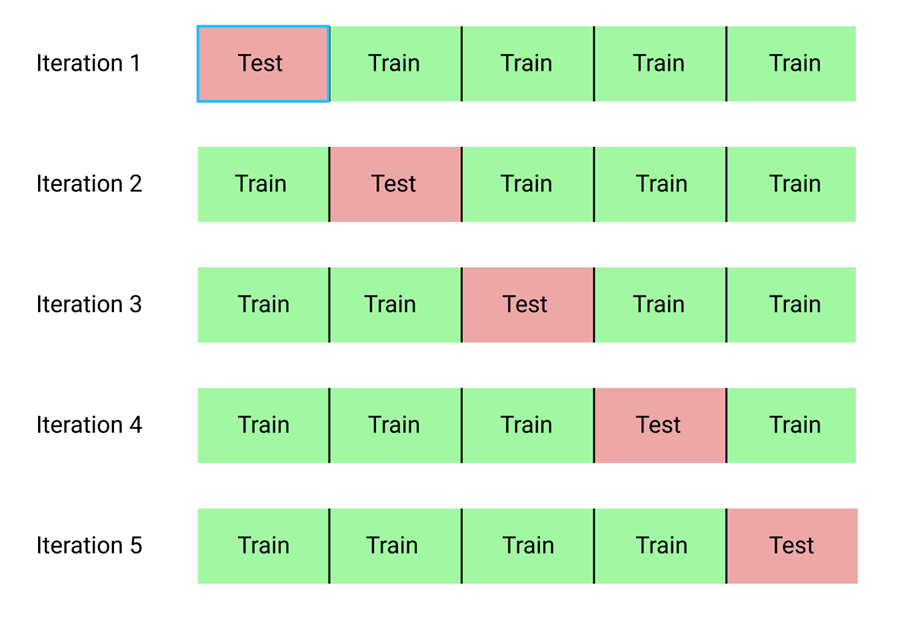

In [ ]:
scores = cross_val_score(model,pre_processed.X,pre_processed.y,cv=4)
print("Cross-validation scores: {}, mean score = {}".format(scores,scores.mean()))